In [74]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Timing and Performance Measurement
from timeit import default_timer as timer
import time

# Data Manipulation and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import RFE, RFECV, mutual_info_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Models and Algorithms
from sklearn.manifold import TSNE
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
import xgboost as XGBClassifier
from xgboost import XGBRegressor

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, precision_recall_curve, make_scorer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Imbalanced Data Handling
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SVMSMOTE, SMOTE, ADASYN

#warnings
import warnings
warnings.filterwarnings('ignore')

# Some Feature Engineering

In [2]:
df = pd.read_csv("loan_model.csv")

In [3]:
df

,Credit_Policy,Purpose,Interest_Rate,Installment,Log_Annual_Income,Debt_Income_Ratio,FICO,Days_with_Credit_Line,Revolving_Balance,Revolving_Utilization,Inquiries_Last_6_Months,Delinquencies_in_2_Years,Public_Records,Not_Fully_Paid,Interest_Rate_Bin,Installment_Interact,Revolving_Utilization_Binned
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.10,0,0,0,0,1,98.579990,1
1,1,debt_consolidation,0.1299,370.59,10.868568,17.94,667,3269.000000,17771,52.10,2,0,0,1,1,48.139641,1
2,1,all_other,0.1166,198.32,11.112448,7.07,677,6060.000000,8224,52.10,0,0,0,0,1,23.124112,1
3,1,credit_card,0.1189,169.14,10.239960,16.11,697,4080.000000,20722,52.10,2,0,0,0,1,20.110746,1
4,1,all_other,0.1189,66.33,9.392662,5.70,707,2970.000000,1616,52.10,1,0,0,0,1,7.886637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1324,104.81,10.714418,12.00,657,8940.000000,2829,108.80,0,0,0,0,1,13.876844,2
9574,0,all_other,0.1103,98.26,10.596635,3.09,677,1291.958333,3127,104.20,0,0,0,0,0,10.838078,2
9575,0,debt_consolidation,0.1166,181.79,9.903688,9.90,677,1471.000000,5111,104.30,4,0,0,0,1,21.196714,2
9576,0,credit_card,0.1222,249.90,11.097410,12.11,677,5070.000000,5319,106.40,0,0,0,0,1,30.537780,2


# Model Building

In [8]:
df1 = pd.get_dummies(data = df)

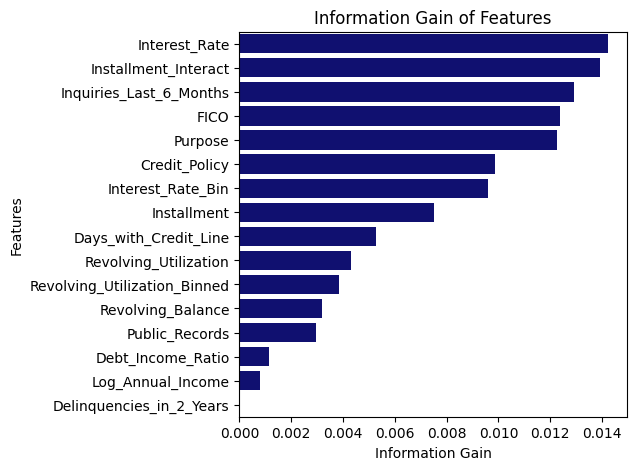

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

x = df1.drop(["Not_Fully_Paid"], axis=1)
y = df1["Not_Fully_Paid"]

information_gain = mutual_info_classif(x, y)

# Create a DataFrame with feature names and their information gain values
gain_df = pd.DataFrame({"Feature": x.columns, "Information Gain": information_gain})

# Sort the DataFrame by information gain values in descending order
gain_df_sorted = gain_df.sort_values(by="Information Gain", ascending=False)

# Plot the sorted information gain values
plt.figure(figsize=(5, 5))
sns.barplot(x="Information Gain", y="Feature", data=gain_df_sorted, color='navy')
plt.title("Information Gain of Features")
plt.xlabel("Information Gain")
plt.ylabel("Features")
plt.show()



In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [108]:
#models
logreg = LogisticRegression()
gbc = GradientBoostingClassifier()
rcl = RandomForestClassifier()
svm = SVC()
svr = SVR()
xgb = XGBClassifier()

#sampling instances
sm = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)

#Scaling instances
scaler = StandardScaler()
mm = MinMaxScaler()

#cross-validation instances
cv = StratifiedKFold(n_splits=10)

In [15]:
# Store the column names
column_names = x_train.columns
# Fit the scaler on the training data
scaler.fit(x_train)
# Transform the training and testing data
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=column_names)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=column_names)

In [16]:
# Apply ADASYN for data balancing
adasyn = ADASYN(random_state=42)
x_train_balanced, y_train_balanced = adasyn.fit_resample(x_train_scaled, y_train)

In [17]:
param_grid = {'C': [0.1, 1.0, 10.0],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(logreg, param_grid, scoring='recall')

# Fit the grid search on the balanced training data
grid_search.fit(x_train_balanced, y_train_balanced)

# Retrieve the best estimator from the grid search
best_logreg = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_logreg.predict(x_test_scaled)

In [21]:
# Generate predictions for both training and testing data
y_train_pred = best_logreg.predict(x_train_balanced)
y_test_pred = best_logreg.predict(x_test_scaled)

# Calculate accuracy, recall, and ROC AUC for training data
train_accuracy = best_logreg.score(x_train_balanced, y_train_balanced)
train_recall = classification_report(y_train_balanced, y_train_pred)
train_roc_auc = roc_auc_score(y_train_balanced, best_logreg.predict_proba(x_train_balanced)[:, 1])

# Calculate accuracy, recall, and ROC AUC for testing data
test_accuracy = best_logreg.score(x_test_scaled, y_test)
test_recall = classification_report(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, best_logreg.predict_proba(x_test_scaled)[:, 1])

# Print the classification reports
print("Training Data:")
print("Accuracy:", train_accuracy)
print("Recall:")
print(train_recall)
print("ROC AUC:", train_roc_auc)

print("Testing Data:")
print("Accuracy:", test_accuracy)
print("Recall:")
print(test_recall)
print("ROC AUC:", test_roc_auc)

Training Data:
Accuracy: 0.6148106992618462
Recall:
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      6436
           1       0.61      0.59      0.60      6163

    accuracy                           0.61     12599
   macro avg       0.61      0.61      0.61     12599
weighted avg       0.61      0.61      0.61     12599

ROC AUC: 0.6692308204286956
Testing Data:
Accuracy: 0.6075156576200418
Recall:
              precision    recall  f1-score   support

           0       0.89      0.60      0.72      1609
           1       0.23      0.62      0.34       307

    accuracy                           0.61      1916
   macro avg       0.56      0.61      0.53      1916
weighted avg       0.79      0.61      0.66      1916

ROC AUC: 0.6697303239311446


# RFE

In [109]:
from tqdm import tqdm

# Define the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    ADASYN(random_state=42),
    RFECV(estimator=LogisticRegression(), cv=StratifiedKFold(n_splits=10), scoring='recall'),
    LogisticRegression()
)

# Fit the pipeline on the training data with a progress bar
with tqdm(total=1, desc='Pipeline Progress') as pbar:
    pipeline.fit(x_train, y_train)
    pbar.update(0.50)  # Update progress bar after each step

    # Make predictions on the test set
    y_pred = pipeline.predict(x_test)
    pbar.update(0.25)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)
    pbar.update(0.25)

# Print the recall score
print("Recall score: {:.4f}".format(recall))


Pipeline Progress: 100%|███████████████████████████████████████████████████████████████| 1.0/1 [00:02<00:00,  2.30s/it]

Recall score: 0.6384


In [96]:
classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.90      0.61      0.72      1609
           1       0.24      0.63      0.34       307

    accuracy                           0.61      1916
   macro avg       0.57      0.62      0.53      1916
weighted avg       0.79      0.61      0.66      1916



In [110]:
# Split the data into training and testing sets
x, y = df1.drop("Not_Fully_Paid", axis=1), df1["Not_Fully_Paid"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Define the pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    ADASYN(random_state=42),
    RFECV(estimator=LogisticRegression(), cv=StratifiedKFold(n_splits=10), scoring='recall')
    #GridSearchCV(LogisticRegression(), param_grid={'C': [0.1, 1, 10]}, scoring='recall', cv=StratifiedKFold(n_splits=5))
)

with tqdm(total=1, desc='Pipeline Progress') as pbar:
    # Fit the pipeline on the training data
    pipeline.fit(x_train, y_train)
    pbar.update(0.50)

    # Make predictions on the test set
    y_pred = pipeline.predict(x_test)
    pbar.update(0.25)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)
    pbar.update(0.25)

# Print the recall score
print("Recall score: {:.4f}".format(recall))


Pipeline Progress: 100%|███████████████████████████████████████████████████████████████| 1.0/1 [00:04<00:00,  4.84s/it]

Recall score: 0.6189


# Random Forest Classifier

In [48]:
# Define the pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    ADASYN(random_state=42),
    RFECV(estimator=RandomForestClassifier(), cv=StratifiedKFold(n_splits=10), scoring='recall'),
    RandomForestClassifier()
)

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Print the recall score
print("Recall score: {:.4f}".format(recall))

Recall score: 0.1433


In [111]:
# Define the pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    ADASYN(random_state=42),
    RandomForestClassifier()
)

# Define the parameter grid for GridSearchCV
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 5, 10],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

with tqdm(total=1, desc='Pipeline Progress') as pbar:
    # Create GridSearchCV instance
    grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=10), scoring='recall')
    pbar.update(0.25)

    # Fit the pipeline on the training data using GridSearchCV
    grid_search.fit(x_train, y_train)
    pbar.update(0.25)

    # Get the best estimator from the grid search
    best_estimator = grid_search.best_estimator_
    pbar.update(0.25)

    # Make predictions on the test set using the best estimator
    y_pred = best_estimator.predict(x_test)
    pbar.update(0.25)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

# Print the recall score
print("Recall score: {:.4f}".format(recall))


Pipeline Progress: 100%|█████████████████████████████████████████████████████████████| 1.0/1 [18:46<00:00, 1126.77s/it]

Recall score: 0.4853


# Gradient boost classifier

In [49]:

# Define the pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    ADASYN(random_state=42),
    RFECV(estimator=GradientBoostingClassifier(), cv=StratifiedKFold(n_splits=10), scoring='recall'),
    GradientBoostingClassifier()
)

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(x_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Print the recall score
print("Recall score: {:.4f}".format(recall))

Recall score: 0.1140


In [56]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'gradientboostingclassifier__learning_rate': [0.1, 0.05],
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__max_depth': [3, 4, 5]
}

# Define the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    ADASYN(random_state=42),
    GradientBoostingClassifier()
)

with tqdm(total=1, desc='Pipeline Progress') as pbar:
    # Define the GridSearchCV with the pipeline and parameter grid
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=make_scorer(recall_score),
        cv=StratifiedKFold(n_splits=10),
        verbose=1
    )
    pbar.update(0.25)

    # Fit the GridSearchCV on the training data
    grid_search.fit(x_train, y_train)
    pbar.update(0.25)

    # Make predictions on the test set using the best estimator from GridSearchCV
    y_pred = grid_search.best_estimator_.predict(x_test)
    pbar.update(0.25)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)
    pbar.update(0.25)

    # Print the recall score
    print("Best Recall score: {:.4f}".format(grid_search.best_score_))
    print("Recall score on test set: {:.4f}".format(recall))

Pipeline Progress:   0%|                                                                         | 0/1 [00:00<?, ?it/s]

Fitting 10 folds for each of 18 candidates, totalling 180 fits


Pipeline Progress: 100%|█████████████████████████████████████████████████████████████| 1.0/1 [20:57<00:00, 1257.10s/it]

Best Recall score: 0.3377
Recall score on test set: 0.3844


In [57]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

# Define the pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    ADASYN(random_state=42),
    SVC()
)

with tqdm(total=1, desc='Pipeline Progress') as pbar:
    # Define the GridSearchCV with the pipeline and parameter grid
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=make_scorer(recall_score),
        cv=StratifiedKFold(n_splits=10),
        verbose=1
    )
    pbar.update(0.25)

    # Fit the GridSearchCV on the training data
    grid_search.fit(x_train, y_train)
    pbar.update(0.25)

    # Make predictions on the test set using the best estimator from GridSearchCV
    y_pred = grid_search.best_estimator_.predict(x_test)
    pbar.update(0.25)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)
    pbar.update(0.25)

# Print the recall score
print("Best Recall score: {:.4f}".format(grid_search.best_score_))
print("Recall score on test set: {:.4f}".format(recall))

Pipeline Progress:   0%|                                                                         | 0/1 [00:00<?, ?it/s]

Fitting 10 folds for each of 6 candidates, totalling 60 fits


Pipeline Progress: 100%|██████████████████████████████████████████████████████████████| 1.0/1 [05:19<00:00, 319.50s/it]

Best Recall score: 0.5538
Recall score on test set: 0.5537


In [64]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.05],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Preprocess the training data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
x_train_oversampled, y_train_oversampled = adasyn.fit_resample(x_train_scaled, y_train)

# Define the GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=make_scorer(recall_score),
    cv=StratifiedKFold(n_splits=10),
    verbose=1
)

# Fit the GridSearchCV on the training data
grid_search.fit(x_train_oversampled, y_train_oversampled)

# Make predictions on the test set using the best estimator from GridSearchCV
x_test_scaled = scaler.transform(x_test)
y_pred = grid_search.best_estimator_.predict(x_test_scaled)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

# Print the recall score
print("Best Recall score: {:.4f}".format(grid_search.best_score_))
print("Recall score on test set: {:.4f}".format(recall))


Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best Recall score: 0.7697
Recall score on test set: 0.0977


In [70]:
y_train_oversampled.value_counts()

0    6436
1    6133
Name: Not_Fully_Paid, dtype: int64

In [92]:
# Define the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    ADASYN(random_state=42),
    RFECV(estimator=XGBClassifier(), cv=StratifiedKFold(n_splits=10), scoring='recall'),
    XGBClassifier()
)

# Fit the pipeline on the training data with a progress bar
with tqdm(total=1, desc='Pipeline Progress') as pbar:
    pipeline.fit(x_train, y_train)
    pbar.update(0.50)  # Update progress bar after each step

    # Make predictions on the test set
    y_pred = pipeline.predict(x_test)
    pbar.update(0.25)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)
    pbar.update(0.25)

# Print the recall score
print("Recall score: {:.4f}".format(recall))

Pipeline Progress: 100%|██████████████████████████████████████████████████████████████| 1.0/1 [01:44<00:00, 104.26s/it]

Recall score: 0.0684


In [100]:
def value_cnt_norm_cal(df, feature, target):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    target_prob = df.groupby(feature)[target].mean() * 100  # Calculate the conditional probability
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm, target_prob], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)', 'Target Probability (%)']
    return ftr_value_cnt_concat


In [102]:
value_cnt_norm_cal(df,"Purpose","Not_Fully_Paid")

,Count,Frequency (%),Target Probability (%)
debt_consolidation,3957,41.313427,15.238817
all_other,2331,24.337022,16.602317
credit_card,1262,13.176028,11.568938
home_improvement,629,6.567133,17.011129
small_business,619,6.462727,27.786753
major_purchase,437,4.562539,11.212815
educational,343,3.581123,20.116618


In [103]:
# Calculate conditional probabilities
probabilities = value_cnt_norm_cal(df, "Purpose","Not_Fully_Paid")['Target Probability (%)']

# Replace categorical values with probabilities
df["Purpose"] = df["Purpose"].map(probabilities)


In [105]:
df1 = df